## 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

### 코드5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기

In [2]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = 'C:/datasets/cats_and_dogs/train'

base_dir = 'C:/datasets/cats_and_dogs_small'
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개의 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print ('훈련용 고양이 이미지 전체 개수:',len(os.listdir(train_cats_dir)))

훈련용 고양이 이미지 전체 개수: 1000


In [4]:
print ('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

훈련용 강아지 이미지 전체 개수: 1000


In [5]:
print ('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

검증용 고양이 이미지 전체 개수: 500


In [6]:
print ('검증용 강아지 이미지 전체 개수: ', len(os.listdir(validation_dogs_dir)))

검증용 강아지 이미지 전체 개수:  500


In [7]:
print ('테스트용 고양이 이미지 전체 개수: ', len(os.listdir(test_cats_dir)))

테스트용 고양이 이미지 전체 개수:  500


In [8]:
print ('테스트용 강아지 이미지 전체 개수: ', len(os.listdir(test_dogs_dir)))

테스트용 강아지 이미지 전체 개수:  500


### 5.2.3 네트워크 구성하기

### 코드 5-5 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 코드 5-6 모델의 훈련 설정

In [11]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

### 데이터 전처리

1. 사진 파일 Read
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩
3. 부동 소수 타입의 텐서로 변환
4. 픽셀 값(0~255)의 스케일을 [0,1] 사이로 조정(신경망은 작은 입력 값을 선호)

### 코드 5-7 ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기 (이부분 잘 이해 안감)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # 모든 이미지를 150x150 크기로 바꿈
        target_size=(150, 150),
        batch_size=20,
        # binary_corssentropy 손실을 사용하기 때문에 이진 레이블이 필요
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


### 코드 5-8 배치 제너레이터를 사용하여 모델 훈련 (이 부분 잘 이해 안감)

In [14]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 12s 116ms/step - loss: 0.6888 - acc: 0.5510 - val_loss: 0.6682 - val_acc: 0.6020
Epoch 2/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6601 - acc: 0.6050 - val_loss: 0.6457 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6068 - acc: 0.6715 - val_loss: 0.6189 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5683 - acc: 0.7030 - val_loss: 0.6035 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5351 - acc: 0.7225 - val_loss: 0.5931 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 5s 55ms/step - loss: 0.5146 - acc: 0.7460 - val_loss: 0.5797 - val_acc: 0.6990
Epoch 7/30
100/100 [==============================] - 5s 53ms/step - loss: 0.4840 - acc: 0.7595 - val_loss: 0.5955 - val_acc

In [15]:
model.save('C:/datasets/cats_and_dogs_small_1.h5')

### 코드 5-10 훈련의 정확도와 손실 그래프 그리기

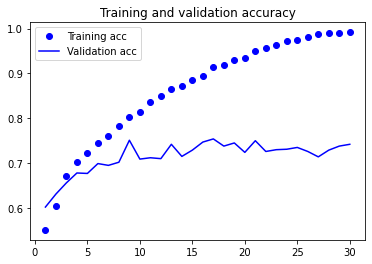

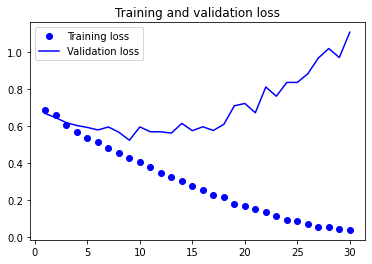

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 코드 5-11 ImageDataGenerator를 사용하여 데이터 증식 설정

In [17]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

### 코드5-12 랜덤하게 증식된 훈련 이미지 그리기

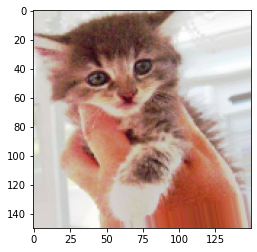

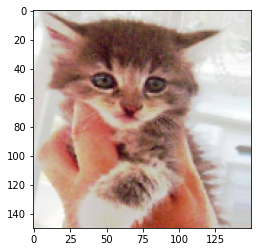

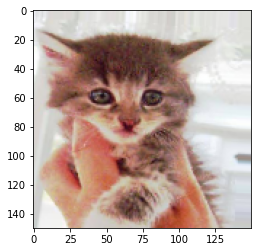

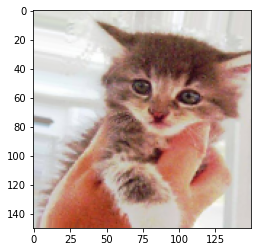

In [19]:
from tensorflow.keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

# 증식할 이미지 선택
img_path = fnames[3]

# 이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)


# 랜덤하게 변환된 이미지 배치를 생성
# 무한 반복 되기 때문에 어느 지점에서 중지해야 함
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i + 1
    if i % 4 == 0:
        break

# 완전 신기해;;
plt.show()

### 코드 5-13 드롭아웃을 포함한 새로운 컨브넷 정의

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

### 코드 5-14 데이터 증식 제너레이터를 사용하여 컨브넷 훈련

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode ='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 18s 179ms/step - loss: 0.6934 - acc: 0.5066 - val_loss: 0.6850 - val_acc: 0.5952
Epoch 2/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6808 - acc: 0.5638 - val_loss: 0.6602 - val_acc: 0.6173
Epoch 3/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6722 - acc: 0.5905 - val_loss: 0.6662 - val_acc: 0.5673
Epoch 4/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6586 - acc: 0.6102 - val_loss: 0.6419 - val_acc: 0.6115
Epoch 5/100
100/100 [==============================] - 17s 169ms/step - loss: 0.6342 - acc: 0.6454 - val_loss: 0.7065 - val_acc: 0.5539
Epoch 6/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6258 - acc: 0.6420 - val_loss: 0.6137 - val_acc: 0.6424
Epoch 7/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6050 - acc: 0.6761 -

100/100 [==============================] - 17s 171ms/step - loss: 0.4203 - acc: 0.8116 - val_loss: 0.4666 - val_acc: 0.7824
Epoch 61/100
100/100 [==============================] - 17s 174ms/step - loss: 0.4182 - acc: 0.8103 - val_loss: 0.4327 - val_acc: 0.8093
Epoch 62/100
100/100 [==============================] - 17s 171ms/step - loss: 0.4118 - acc: 0.8125 - val_loss: 0.4525 - val_acc: 0.7843
Epoch 63/100
100/100 [==============================] - 17s 168ms/step - loss: 0.4061 - acc: 0.8150 - val_loss: 0.4741 - val_acc: 0.7874
Epoch 64/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4047 - acc: 0.8106 - val_loss: 0.4650 - val_acc: 0.7868
Epoch 65/100
100/100 [==============================] - 17s 170ms/step - loss: 0.4043 - acc: 0.8213 - val_loss: 0.6066 - val_acc: 0.7443
Epoch 66/100
100/100 [==============================] - 17s 169ms/step - loss: 0.4033 - acc: 0.8141 - val_loss: 0.4042 - val_acc: 0.8151
Epoch 67/100
100/100 [==============================] 

In [27]:
model.save('C:/datasets/cats_and_dogs_small_2.h5')

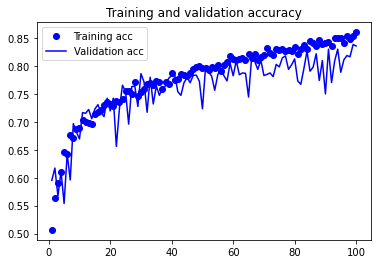

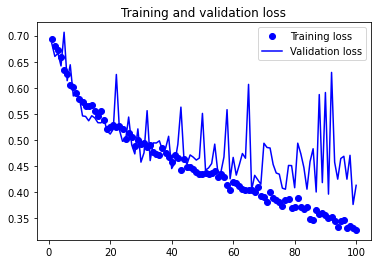

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()